# Tarea 1 Redes Convolucionales

IIC-3697 Aprendizaje Profundo | Abril 2024

Profesor: Álvaro Soto

Ayudante: Brian Murtagh (bmurtagh@uc.cl)


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

c:\Users\Bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pregunta 1: SimpleCNN (30%)

## Actividad 1: CIFAR-10

In [2]:
transform1 = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

In [3]:
"""
TAREA: Como primera tarea deben traer y cargar el dataset de entrenamiento y validación de CIFAR-10 utilizando la librería de torchvision.
Para el dataloader utilice un batch_size de 4.
"""

# Traer datasets

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform1)

# Crear Dataloaders

batch_train_size = 64
batch_test_size = 1024

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_train_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_test_size, shuffle=False, num_workers=4)

# Definir clases

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Responder brevemente aquí:**

*   *¿Que hace el parametro _shuffle_ en los DataLoaders de Pytorch, debemos usarlos para ambos datasets? ¿Por qué?*

El parámetro _shuffle_ sirve para poder randomizar el orden de los datos de entrenamiento antes de formar los _batches_ en cada época.
El beneficio que entrega es reducir el _overfitting_ al agregar aleatoriedad, por lo tanto evita que el
modelo aprenda la secuencia de datos y lo obliga a aprender features más robustas.

En el caso del set de prueba no es recomendable usarlo, debido a que queremos evaluar el rendimiento del
modelo sobre el dataset de manera determinística para asegurar resultados consistentes.


*   *¿Que hace la función ToTensor?¿Qué es un tensor y para que lo utilizamos en Pytorch?*

La función ToTensor convierte un objeto de tipo PIL Image o numpy array a un tensor de Pytorch. En este caso,,
convierte las imágenes a tensores, los cuales son una estructura de datos multi-dimensional (una matriz y un vector son tensores)
que se utiliza para manejar la información en Pytorch. Al usar esta función normalizamos las imágenes
a valores entre 0 y 1 para cada canal de cada pixel.



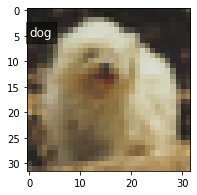

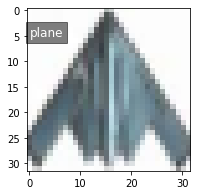

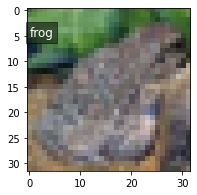

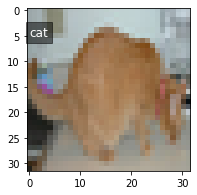

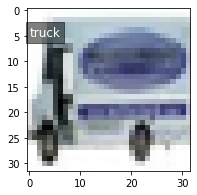

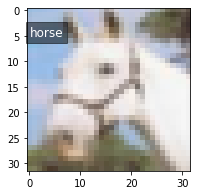

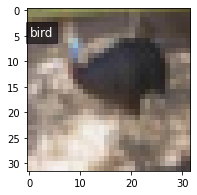

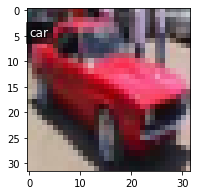

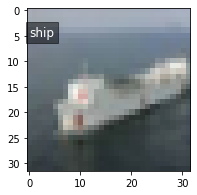

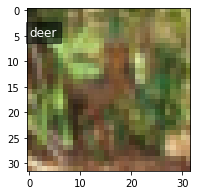

In [6]:
"""
TAREA: Muestra una imagen por cada clase del dataset CIFAR junto a su label
"""
def imshow(img, label):
    img = img / 2 + 0.5 # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.text(0, 5, label, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
    plt.show()

# Imagenes random de cada clase

dataiter = iter(train_loader)
images, labels = next(dataiter)

done = [False] * 10
for i in range(batch_train_size):
    if False not in done:
        break
    if done[labels[i]]:
        continue
    done[labels[i]] = True
    plt.figure(figsize=(3,3))
    imshow(images[i], classes[labels[i]])

<BarContainer object of 10 artists>

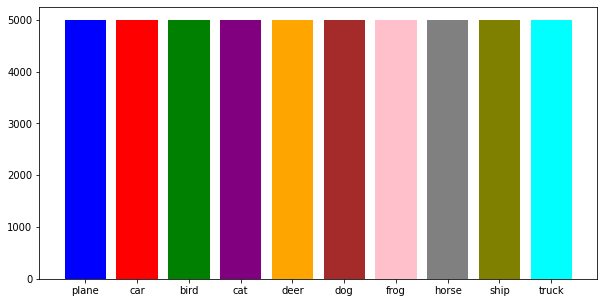

In [7]:
"""
Mostrar la distribución de clases en el dataset de entrenamiento
"""
# Contar cuantas imagenes hay de cada clase
class_count = [0] * 10
for _, labels in train_set:
    class_count[labels] += 1

# Mostrar gráfico
plt.figure(figsize=(10, 5))
plt.bar(classes, class_count, color=['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])

**Responder brevemente aquí:**

*   *¿Que podemos ver de las distribuciones? ¿Cuál es el impacto del balance de una base de datos en Deep Learning y CV (Computer Vision)?*

Podemos apreciar que en el set de entrenamiento es completamente uniforme en su distribución.
Esto es deseable para el aprendizaje debido a que de esta forma el modelo no tenderá a favorecer alguna clase por sobre las demás por el
simple hecho de que hay más ejemplos de esta clase. Esto pasaría ya que al tomar una imagen aleatoria
tendría más probabilidad de ser de la clase con más imágenes que de el resto.

## Actividad 2: Crear SimpleCNN

In [11]:
"""
TAREA: Ahora deben implementar una clase simple de una red convolucional en Pytorch según el diagrama del enunciado.
"""
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Defina los componentes de la CNN
        self.conv1 = nn.Conv2d(3, 6, 5) # 28x28x6
        self.pool1 = nn.MaxPool2d(2, 2) # 14x14x6
        self.conv2 = nn.Conv2d(6, 16, 5) # 10x10x16
        self.pool2 = nn.MaxPool2d(2, 2) # 5x5x16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Conecte correctamente los componentes segun la arquitectura
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


**Responder aquí:**

*   ¿Qué es el Max Pooling? ¿Para qué lo utilizamos en CNN?

El Max Pooling es una función que toma un _kernel_ y se desliza por la imagen tomando el valor máximo de cada región
que cubre el _kernel_. Esto se hace para reducir la dimensionalidad de la imagen y extraer características más generales
de la imagen. Además, ayuda a hacer el modelo más robusto a pequeñas variaciones en la posición de los features.

.


*   ¿Qué ventajas tiene usar ReLU en vez de una funciónde activación Sigmoide?

La función ReLU es más eficiente computacionalmente que la función sigmoide, ya que no tiene que calcular la exponencial.
Además, la función ReLU no sufre del problema de _vanishing gradient_ que tiene la función sigmoide, lo que permite
entrenar redes más profundas sin que el gradiente se haga muy pequeño.

.



## Actividad 3

In [31]:
"""
NO cambiar esta celda
"""
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifer_model = SimpleCNN()
classifer_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifer_model.parameters(), lr=0.001, momentum=0.9)

In [53]:
"""
TAREA: Complete el loop de entrenamiento

TIP: recuerda debes utilizar optimizer, criterion y el modelo
"""

NUM_EPOCHS = 10
total_step = len(train_loader)

losses = []
for epoch in range(NUM_EPOCHS):
    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = classifer_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            # loss = criterion ;)
            print (f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_step}] Loss: {loss.item():.4f}")        
    losses.append(loss.item())

print('Termina Entrenamiento!')

Epoch [1/10], Step [100/782] Loss: 0.8341
Epoch [1/10], Step [200/782] Loss: 0.7043
Epoch [1/10], Step [300/782] Loss: 0.5176
Epoch [1/10], Step [400/782] Loss: 0.6514
Epoch [1/10], Step [500/782] Loss: 0.5678
Epoch [1/10], Step [600/782] Loss: 0.7447
Epoch [1/10], Step [700/782] Loss: 0.8143
Epoch [2/10], Step [100/782] Loss: 0.7691
Epoch [2/10], Step [200/782] Loss: 0.6410
Epoch [2/10], Step [300/782] Loss: 0.5025
Epoch [2/10], Step [400/782] Loss: 0.6425
Epoch [2/10], Step [500/782] Loss: 0.7417
Epoch [2/10], Step [600/782] Loss: 0.5570
Epoch [2/10], Step [700/782] Loss: 0.6538
Epoch [3/10], Step [100/782] Loss: 0.5985
Epoch [3/10], Step [200/782] Loss: 0.4973
Epoch [3/10], Step [300/782] Loss: 0.6085
Epoch [3/10], Step [400/782] Loss: 0.6028
Epoch [3/10], Step [500/782] Loss: 0.3840
Epoch [3/10], Step [600/782] Loss: 0.7960
Epoch [3/10], Step [700/782] Loss: 0.9290
Epoch [4/10], Step [100/782] Loss: 0.7451
Epoch [4/10], Step [200/782] Loss: 0.4397
Epoch [4/10], Step [300/782] Loss:

In [54]:
PATH = './cifar_model.pth'
torch.save(classifer_model.state_dict(), PATH)

In [55]:
print(losses)

[1.000056505203247, 0.49902331829071045, 0.9326269626617432, 1.118703842163086, 0.5176152586936951, 0.4733984172344208, 0.7353320121765137, 0.8390181660652161, 0.4227102994918823, 0.9959769248962402]


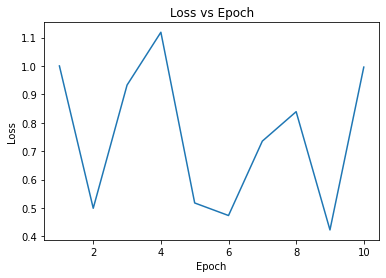

In [56]:
"""
TAREA: Grafique la perdida (loss) vs epochs
"""

plt.plot([i+1 for i in range(NUM_EPOCHS)], losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [62]:
"""
TAREA: Calcule la precisión del modelo (accuracy)
"""
correct = 0
total = 0

classifer_model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = classifer_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

classifer_model.train()

print(f'Para un las {len(test_set)} imágenes de test se tiene un Accuracy: {accuracy}%')

Para un las 10000 imágenes de test se tiene un Accuracy: 64.61%


**Responder aquí:**
*   Explica brevemente porque utilizamos torch.no_grad() y model.eval() cuando evaluamos modelos en Pytorch.

Utilizamos torch.no_grad() para deshabilitar el cálculo de gradientes en el _forward pass_ de la red, ya que no necesitamos
calcular gradientes en el set de prueba y esto ahorra memoria y tiempo de cómputo. Por otro lado, utilizamos model.eval()
para poner el modelo en modo de evaluación, lo que desactiva capas como el _dropout_ y _batch normalization_ que se utilizan
durante el entrenamiento, además de cambiar el comportamiento de algunas capas como _BatchNorm_ para que se comporten de manera
determinística.

.

## Pregunta 2: ResNet (50%)

## Actividad 4

In [ ]:
"""
Instancie nuevamente los Data Loaders pero ahora con un batch 100
"""

# train_loader = ...

# test_loader = ...

**Responder brevemente aquí:**

*   ¿Qué es el *batch_size* y en que influye su tamaño? Mencione ventajas y desventajas de utilizar batchs

Tu Respuesta...



In [ ]:
"""
Vamos a utilizar CUDA para acelerar el entrenamiento, no olvide enviar sus
tensores y modelos con .to(device). Investigue cuando usar este metodo ya que
es muy importante usarlo correctamente
"""

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Deberia mostrar "cuda" y no "cpu"

cuda


## Actividad 5


In [ ]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# ResidualBlock o BasicBlock
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        ###
        #
        #
        # DEFINIR AQUI
        #
        #
        ###
        self.downsample = downsample

    def forward(self, x):
        residual = x
        ###
        #
        #
        # COMPLETAR AQUI
        #
        #
        ###
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        #### COMPLETAR AQUI ####
        # self.conv = conv3x3(...)
        # self.bn = nn.BatchNorm2d(...)
        # self.relu = nn.ReLU(inplace=True)
        # self.layer1 = self.make_layer(block, ...)
        # self.layer2 = self.make_layer(block, ...)
        # self.layer3 = self.make_layer(block, ...)
        # self.avg_pool = nn.AvgPool2d(...)
        # self.fc = nn.Linear(...)
        ######################

    # NO MODIFICAR
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        ###
        #
        #
        # COMPLETAR AQUI
        #
        #
        ###
        return out

In [ ]:
"""
TAREA: Instancia el modelo y envialo a la GPU
Recuerda que es ResNet18
"""
# model = ResNet(ResidualBlock, ...)

**Responder aquí:**

*   *¿Qué son los Residual Blocks y cuál es su impacto?*

Tu Respuesta...


**Responder aquí:**

*   *¿Describa detalladamente que hace la función make_layers?*

Tu Respuesta...

## Actividad 6

In [ ]:
"""
NO cambiar esta celda
"""

# Hyperparametros
NUM_EPOCHS = 20
LEARNING_RATE = 0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
"""
Entrenamiento: utilice el modelo, el criterion y el optimizer para entrenar el modelo.
Deben utilizar GPU.
"""

total_step = len(train_loader)

for epoch in range(NUM_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        ###
        #
        #
        # COMPLETAR AQUI
        #
        #
        ###
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, NUM_EPOCHS, i+1, total_step, loss.item()))


In [ ]:
"""""
Evaluación: utilice el modelo para obtener la precisión
"""


print(f'Accuracy: {accuracy}%')



Responder aquí:

*¿Qué es y que hacen en el entrenamiento de la red las variables optimizer y criterion?*

Tu Respuesta...

.

.


*¿Qué puede observar de la precisión del modelo? Analise el resultado.*

Tu Respuesta...

.

.

## Object Detection (20%)

## Actividad 7

In [ ]:
"""""
Traemos la libreria de YOLO ultralytics
"""
!pip install ultralytics

from IPython.display import clear_output, display, Image
import os
clear_output()

HOME = os.getcwd()
print(HOME)

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 28.9/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

""""
TAREA: Instancie el modelo YOLOv8 para segmentacion y obtenga la prediccion de la foto entregada
"""
image_to_predict = 'https://ultralytics.com/images/bus.jpg'


In [ ]:
""""
TAREA: Muestra la foto segmentada por Yolov8 (puedes usar Image())
"""

**Responder aquí:**

*   *¿Por qué utilizamos modelos pre-entrenados (pretrained)? ¿Cuáles son las ventajas y desventajas?*

Tu Respuesta...

.

.

## Actividad 8

In [ ]:
""""
TAREA: Ahora intenta utilizar un modelo pre-entrenado para segmentacion de las 3
imagenes de grietas
"""


In [ ]:
""""
TAREA: Muestra la foto segmentada por Yolov8
"""


**Responder aquí:**

*   *¿Pudo reconocer el modelo las grietas? ¿Por qué pudo reconocer personas/buses y no las
grietas?*

Tu Respuesta...

.

.

## Actividad 9

In [ ]:
""""
TAREA: Ahora debes traer la data de las grietas
"""

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Nuestra carpeta con las imagenes de grietas
folder_path = '/content/drive/MyDrive/cracks-dataset'

In [ ]:
""""
TAREA: Ahora debes entrenar (fine-tune) el modelo YOLOv8 para segmentacion de una grietas
TIP esto puede tomar un tiempo y se debe usar GPU.
"""


In [ ]:
""""
TAREA: Muestra una foto de batch del entrenamiento
"""


In [ ]:
""""
TAREA: Ahora realiza una prediccion a la foto de la grieta inicial con el modelo entrenado
"""



In [ ]:
""""
TAREA: Muestra las fotos de la grietas segmentadas por Yolov8
"""

**Responder aquí:**

*   ¿Por qué ahora el modelo detecta las imágenes? Investigue y explique que es Fine Tunning.

Tu Respuesta...

Por último:

**Responder aquí:**

*   Explique el aporte del modelo Yolo a CV y sus principales innovaciones

Tu Respuesta...
.

.

.


*   De y explique 3 ejemplos de donde aplicar este tecnolgias y sus ventajas.

Tu Respuesta...
.

.

.



*   ¿Qué consideraciones se deben tener al aplicar CV en la vida real? Nombre algunos riesgos de utilizar CV

Tu Respuesta...
.

.

.



In [ ]:
"""
FIN :)
"""